In [ ]:
# prompt: install and import essential lib
!pip install lasio #install lasio lib for las read
import pandas as pd #type of data format
import numpy as np #comuptaional lib
from matplotlib import pyplot as plt #lib use for plot dispaly
from google.colab import drive #reading file from google drive
import lasio

# Mount Google Drive to upload the las file after converted to csv and save in google drive.
drive.mount('/content/drive')

# Replace with your file path in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/ML FOR Geoscience/Vshale/attri-log.csv'
df = pd.read_csv(file_path) #read CSV data
display(df.head(3)) #show data for first three lines


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,Vsh,Energy,Ins_Ampl,Ins_Freq,Sim_Fblock,ins_hilbert,sem_cross,Sim_Alldirt,Velo_Data,Relief,Phase,Amp_1,CoPhase,Seis_Data
0,-24.000000,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30
1,-23.950487,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30
2,-23.900974,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30,1.000000e+30


Data Rangling and Plotting

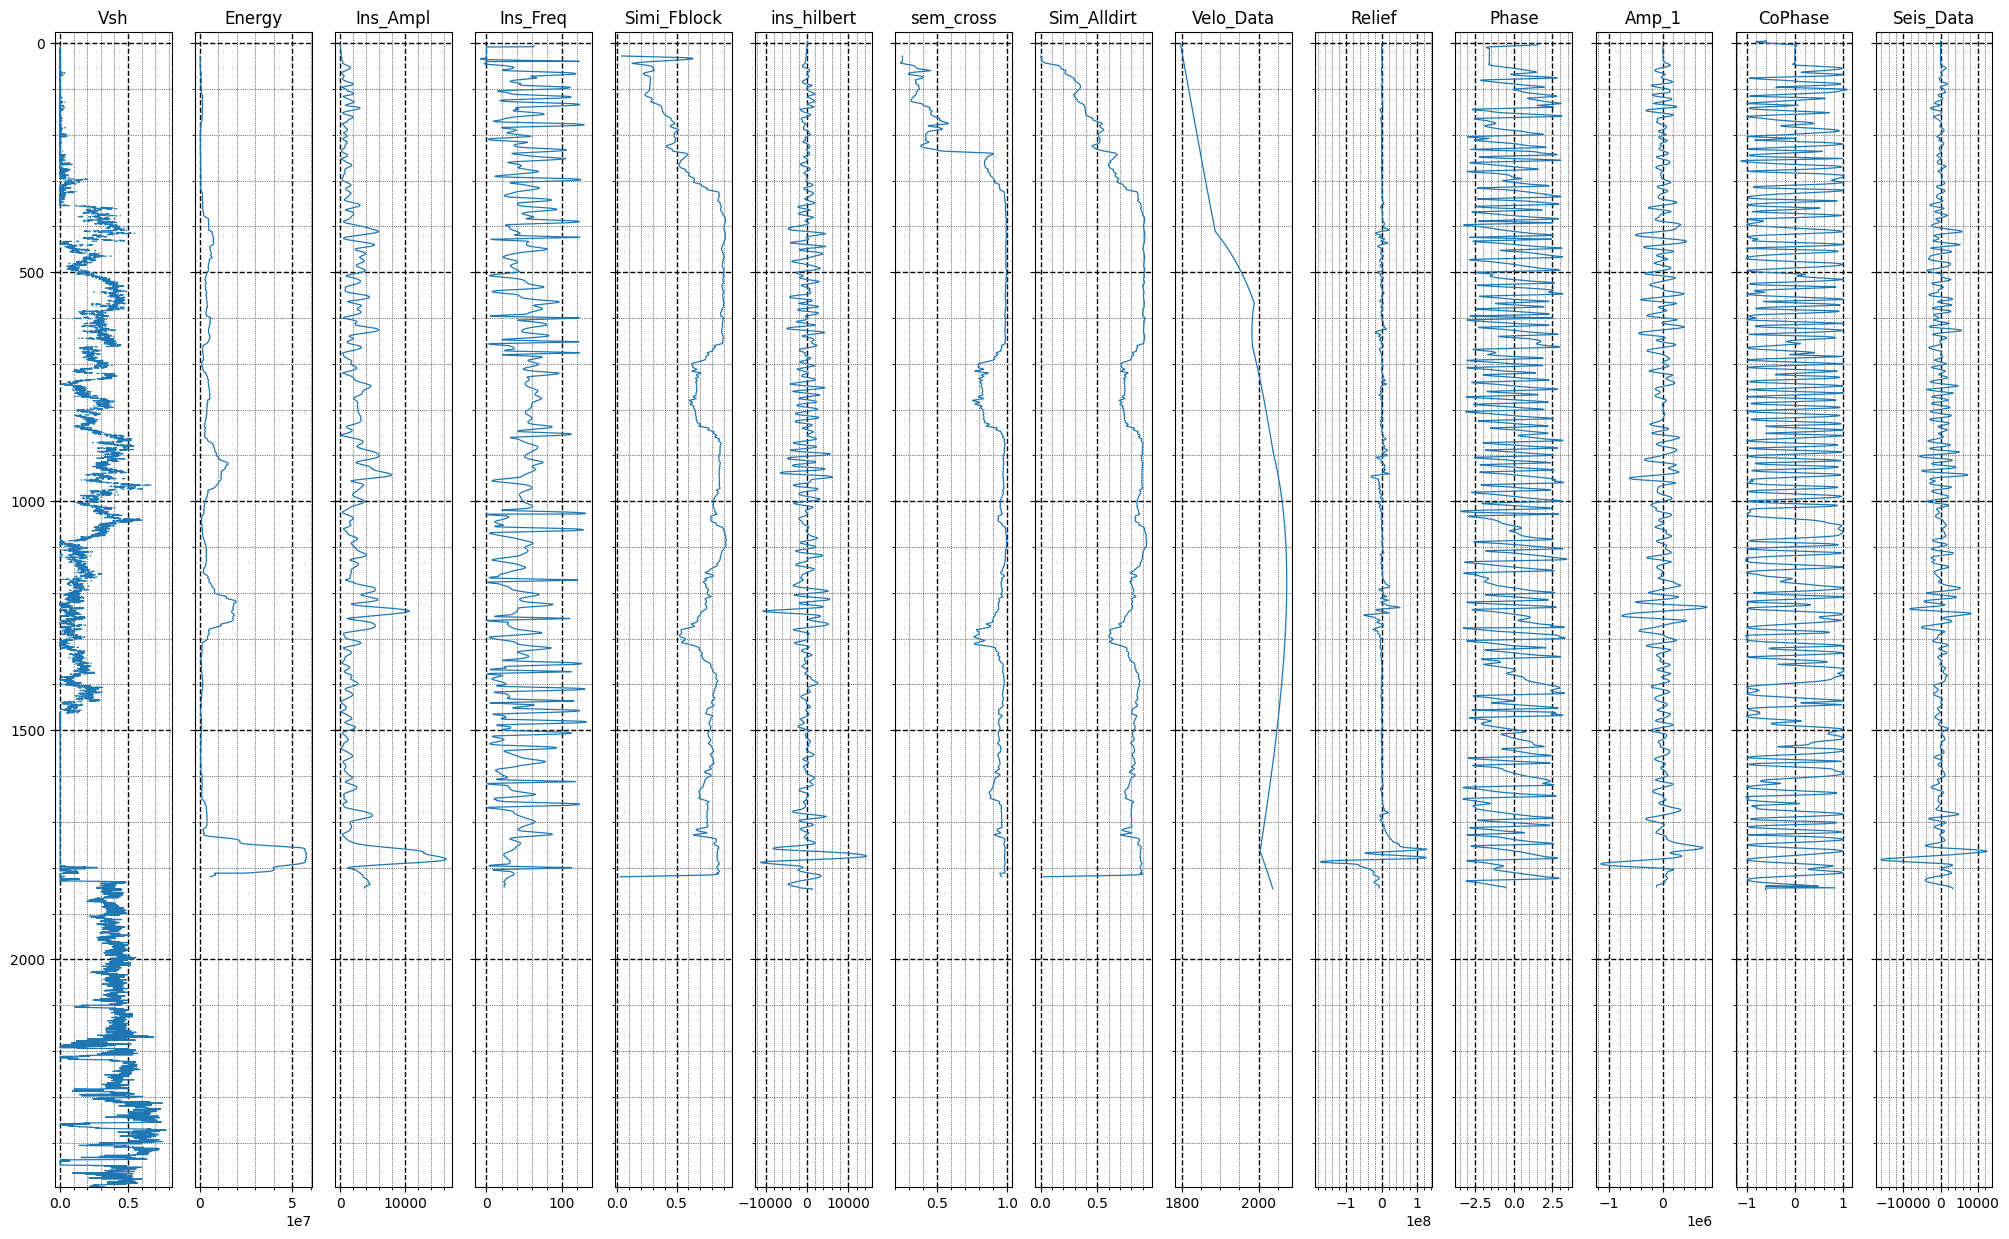

In [ ]:
# Remove Null Values in logs(1.000e+30) as showed avove in column
df[df==1.000000e+30]=np.nan    #any value as 1.000000e+30 instead it by Nan
# Plot the Attribute Logs from top surface
rows, cols = 1,len(df.columns)-1   #define the variables based on df; row=1 and column=len(df.column) is total number of columns in df
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25,15), sharey=True) #create figure, size(wide, tall inch), sharey= all plot share same y axis.
names = ['Time', 'Vsh', 'Energy', 'Ins_Ampl', 'Ins_Freq', 'Simi_Fblock',
       'ins_hilbert', 'sem_cross', 'Sim_Alldirt', 'Velo_Data', 'Relief', 'Phase', 'Amp_1', 'CoPhase', 'Seis_Data']
for i in range(cols):  #apply the follow for every col
    ax[i].plot(df.iloc[:,i+1], df.iloc[:,0],linewidth='0.9')#i=num of col, iloc':'=all rows & i+1=cols in df,[:,0]=all rows & 1st colmn
    ax[i].set_ylim(max(df.iloc[:, 0]), min(df.iloc[:, 0]))   #set y-axis lower limits & max limits, find min & max value in 1st column[:, 0]
    ax[i].minorticks_on() #show min tick on x,y axes
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')   #style of grid, grid line for major
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i+1])


In [ ]:
# Zone of Interest data: from 500ms to 1100ms
df_new = df[(df.Time >= 500) & (df.Time <= 1100)]
df_new.describe()

,Time,Vsh,Energy,Ins_Ampl,Ins_Freq,Sim_Fblock,ins_hilbert,sem_cross,Sim_Alldirt,Velo_Data,Relief,Phase,Amp_1,CoPhase,Seis_Data
count,12118.000000,8409.000000,1.211800e+04,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000,1.211800e+04,12118.000000,12118.000000,12118.000000,12118.000000
mean,799.979255,0.297792,4.509005e+06,2604.629462,54.847561,0.812312,-25.400804,0.934692,0.852781,2019.958578,-1.460251e+05,0.072613,-1648.996707,0.004734,29.177572
std,173.213626,0.106527,3.096770e+06,1443.013882,22.426261,0.092873,1997.803684,0.068950,0.071617,33.717954,5.628011e+06,1.615154,169103.134388,0.669858,1987.356989
min,500.001617,0.000000,9.032865e+05,102.101074,-0.440769,0.607614,-6440.270020,0.749494,0.693586,1954.877075,-3.009399e+07,-3.422756,-622048.437500,-1.000000,-5627.196777
25%,649.990417,0.224300,2.633392e+06,1612.183442,45.111320,0.746961,-1363.105957,0.909460,0.801211,1986.413605,-2.375009e+06,-1.266083,-101996.380825,-0.660762,-1403.284241
50%,799.979309,0.304300,3.666285e+06,2487.861816,56.120640,0.859562,39.534370,0.970368,0.892079,2019.165528,-1.279472e+05,0.104458,9407.398926,0.022342,25.391701
75%,949.968094,0.373876,5.172000e+06,3207.099231,65.596689,0.887421,1303.678863,0.984797,0.908681,2052.771301,2.186459e+06,1.457571,109661.152375,0.664396,1299.821259
max,1099.956909,0.667391,1.530774e+07,7939.245606,131.168472,0.922562,6176.000000,0.994536,0.936363,2071.896240,2.135859e+07,3.220816,406073.906300,1.000000,7311.129395


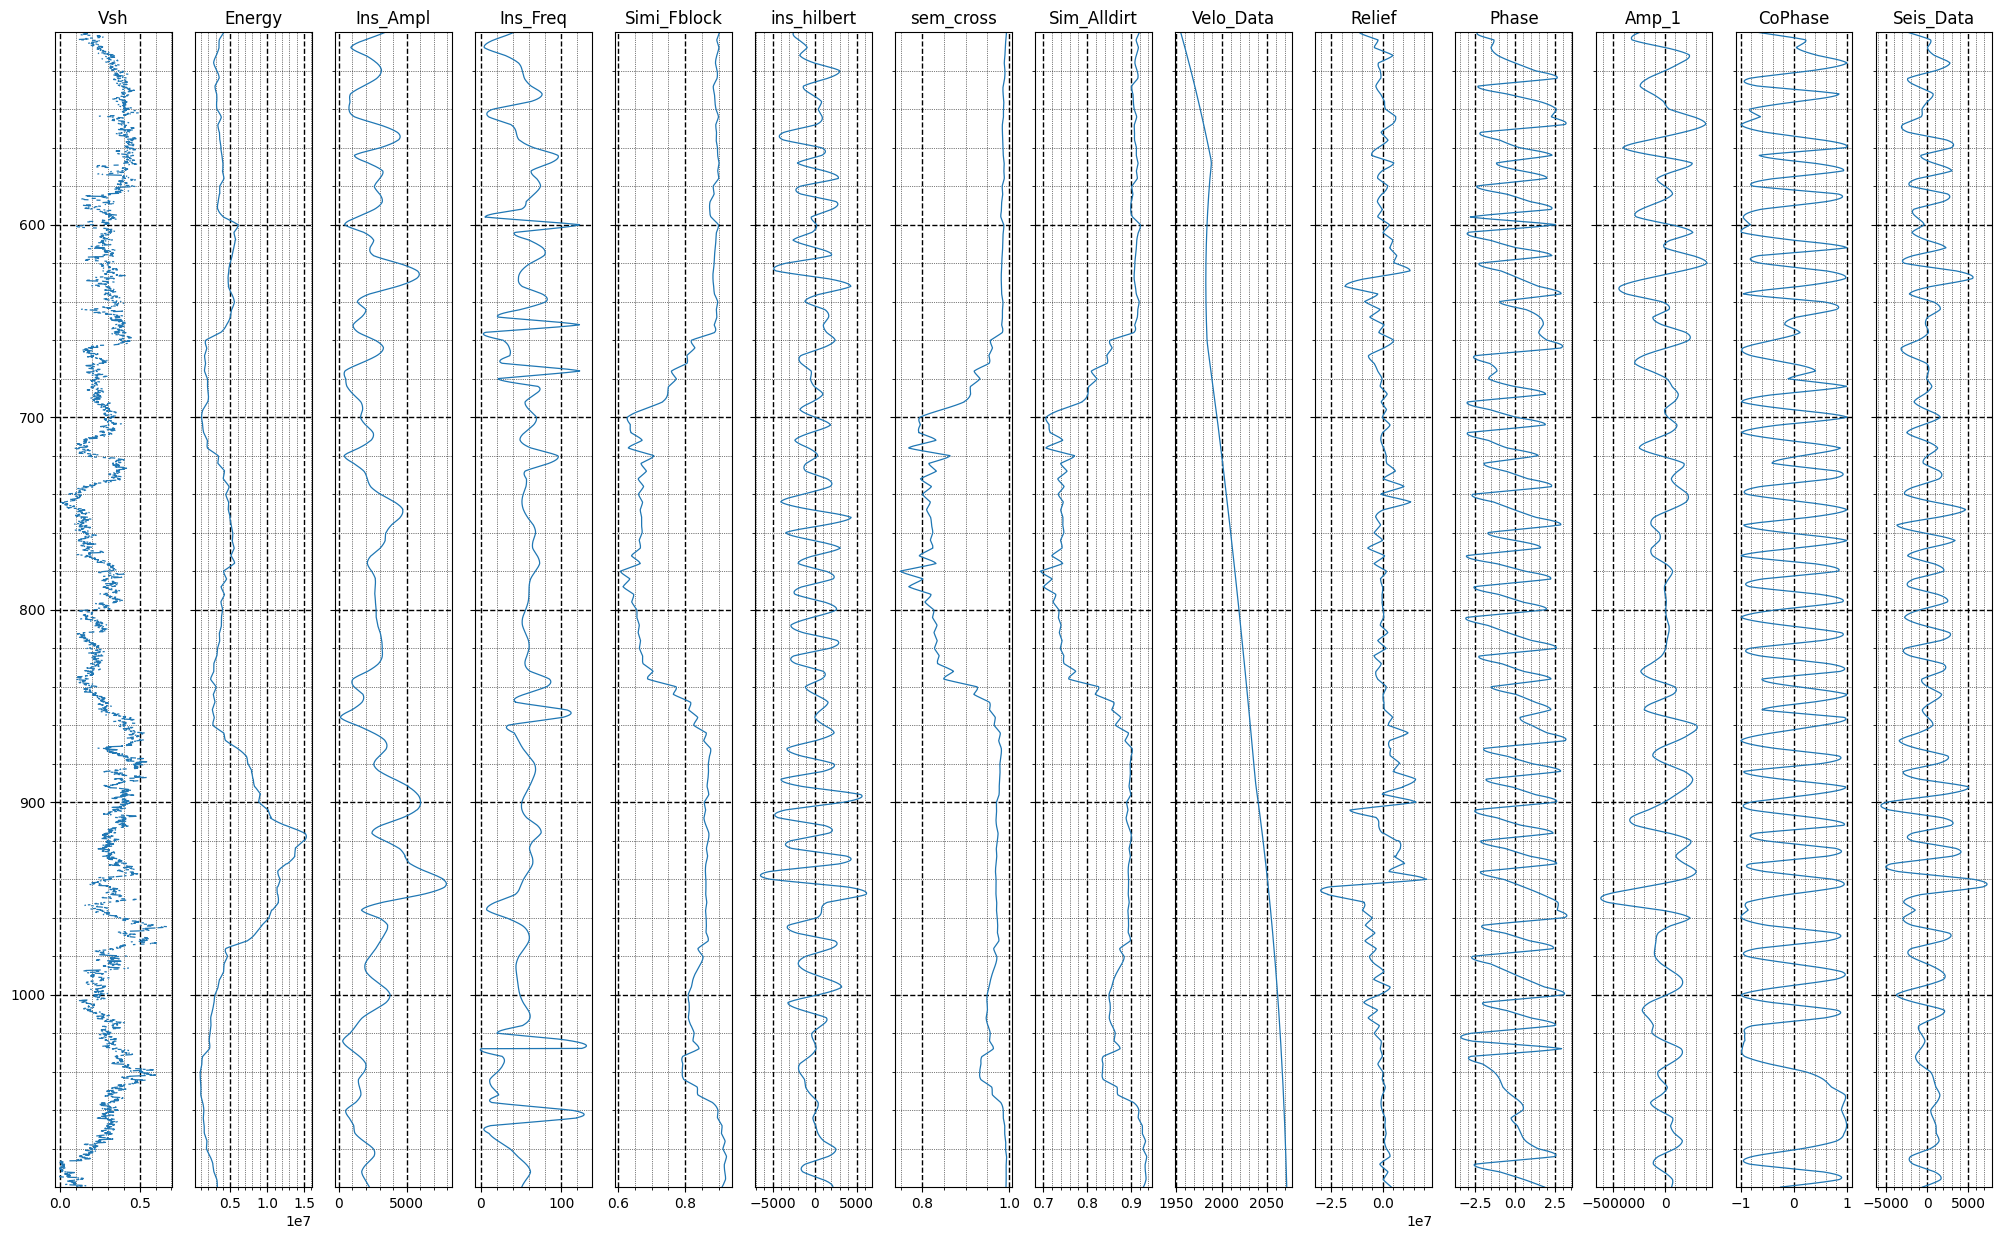

In [ ]:
#Plot the Attribute Logs from top surface for zone of interest
rows, cols = 1,len(df_new.columns)-1
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25,15), sharey=True)
names =  'Vsh', 'Energy', 'Ins_Ampl', 'Ins_Freq', 'Simi_Fblock', 'ins_hilbert', 'sem_cross', 'Sim_Alldirt', 'Velo_Data', 'Relief', 'Phase', 'Amp_1', 'CoPhase', 'Seis_Data'
for i in range(cols):
    ax[i].plot(df_new.iloc[:,i+1], df_new.iloc[:,0],linewidth='0.9')
    ax[i].set_ylim(max(df_new.iloc[:, 0]), min(df_new.iloc[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i]) # Changed from names[i+1] to names[i]

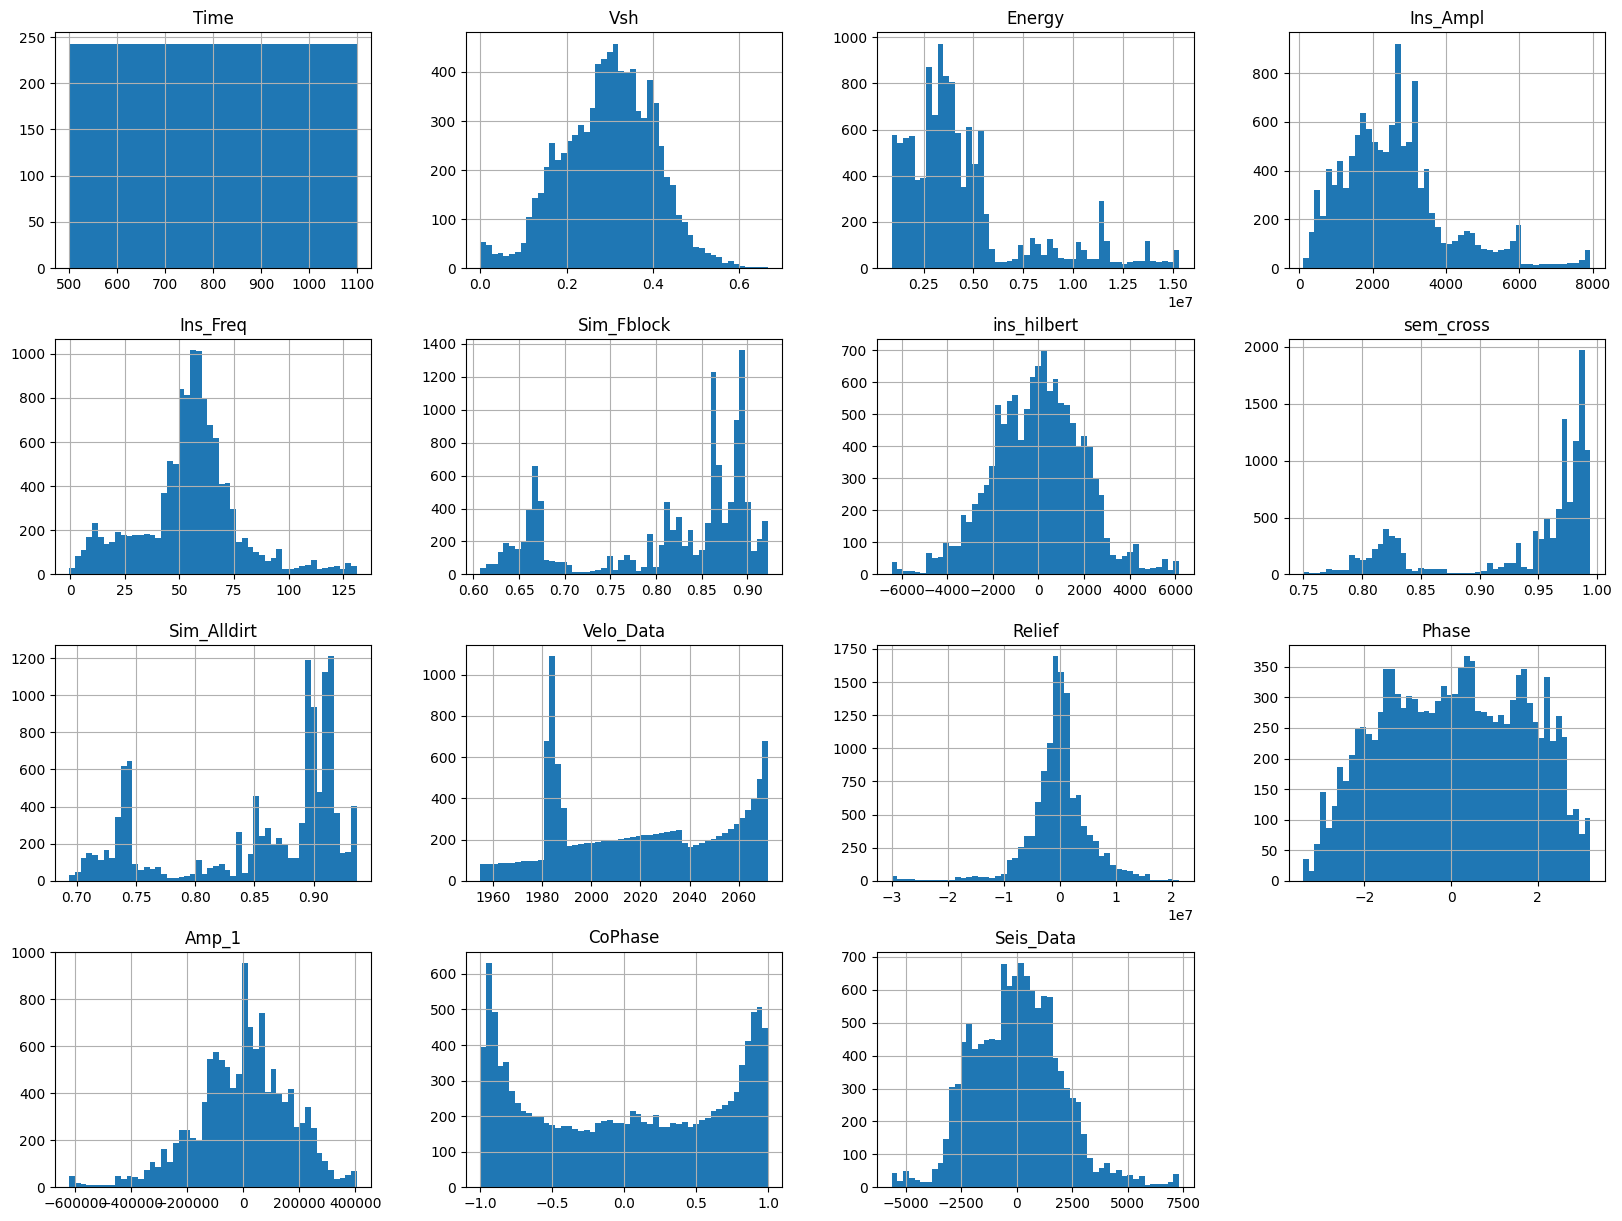

In [ ]:
# Plot histograms of the input attributes to QC the scale and data frequency domain
df_new.hist(bins=50, figsize=(20,15))
plt.show()

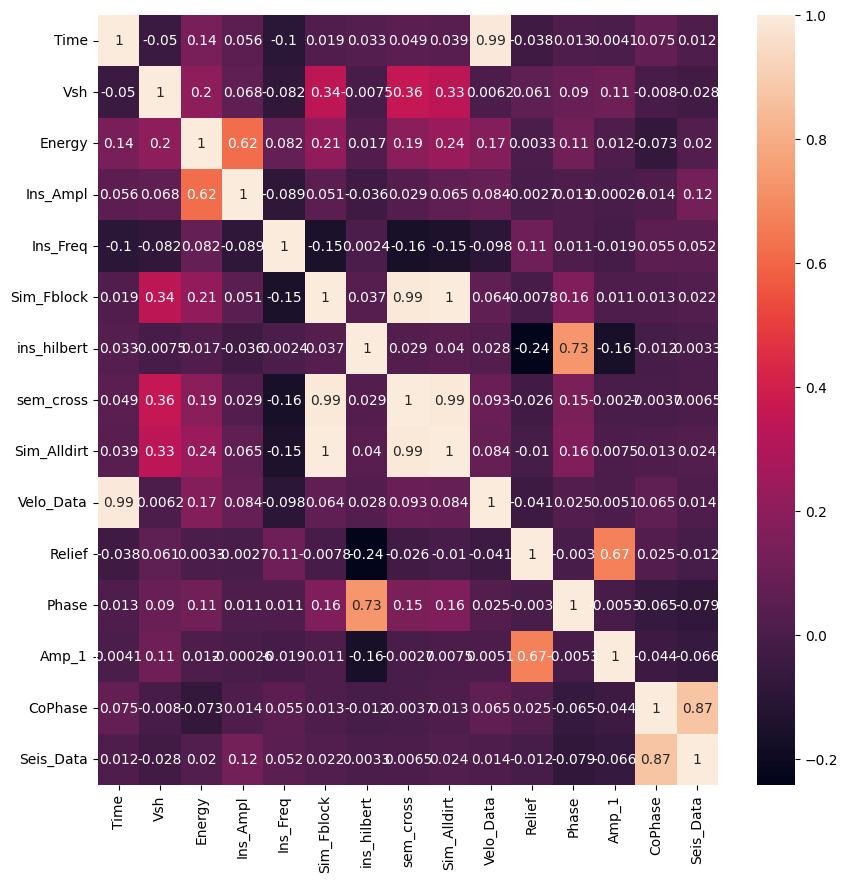

In [ ]:
# Plot correlation matrix(heat map) to show relations between features
import seaborn as sns   #data visulization
plt.figure(figsize = (10,10))
sns.heatmap(df_new.corr(),annot=True)  #graphic represent of data where  value are represented by color, visulize the correlation coefficient between differ  two well logs
plt.show()

In [ ]:
# Define dataset and Prediction, all data Vs shale volume x, y
Xdata = df_new[['Energy', 'Ins_Ampl', 'Ins_Freq', 'Sim_Fblock', 'ins_hilbert', 'sem_cross', 'Sim_Alldirt', 'Velo_Data', 'Relief', 'Phase', 'Amp_1', 'CoPhase', 'Seis_Data']]
ydata = df_new['Vsh']

print("shape of Xdata: ", Xdata.shape)
print("shape of Ydata: ", ydata.shape)

shape of Xdata:  (12118, 13)
shape of Ydata:  (12118,)


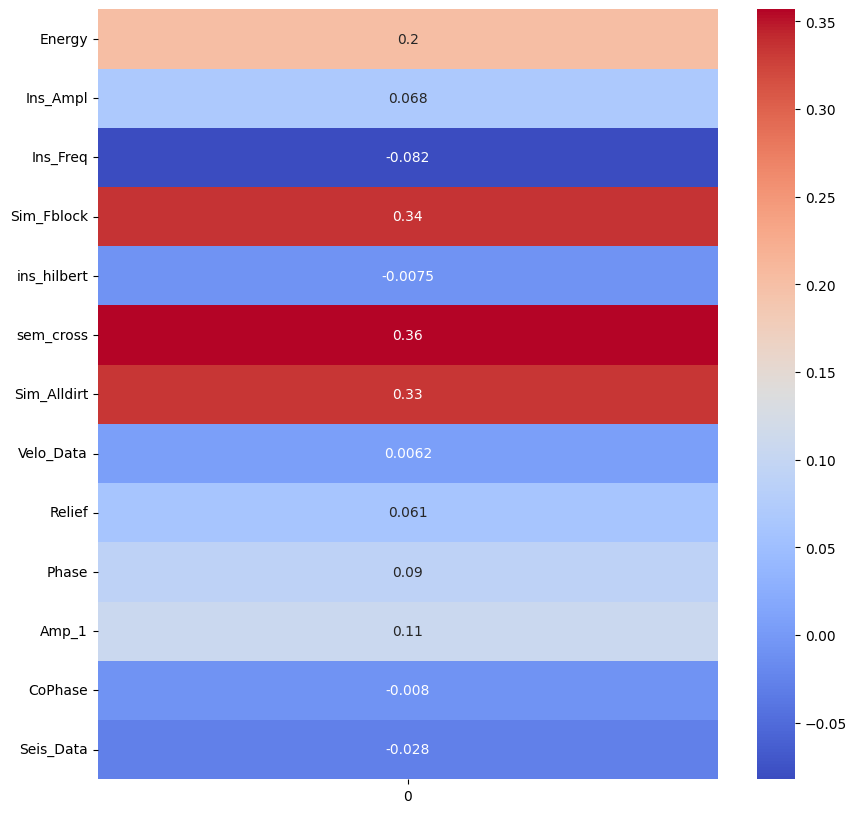

In [ ]:
# Plot correlation matrix to show relations between features of x & y
import seaborn as sns
plt.figure(figsize = (10,10))
corr_matrix = Xdata.corrwith(ydata) # This will calculate pairwise correlation of columns in Xdata with ydata.
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm') # Plot Heatmap and using .to_frame() to convert Series to DataFrame for heatmap plotting compatibility, annot=annotaion the number of correlation not just color
plt.show()

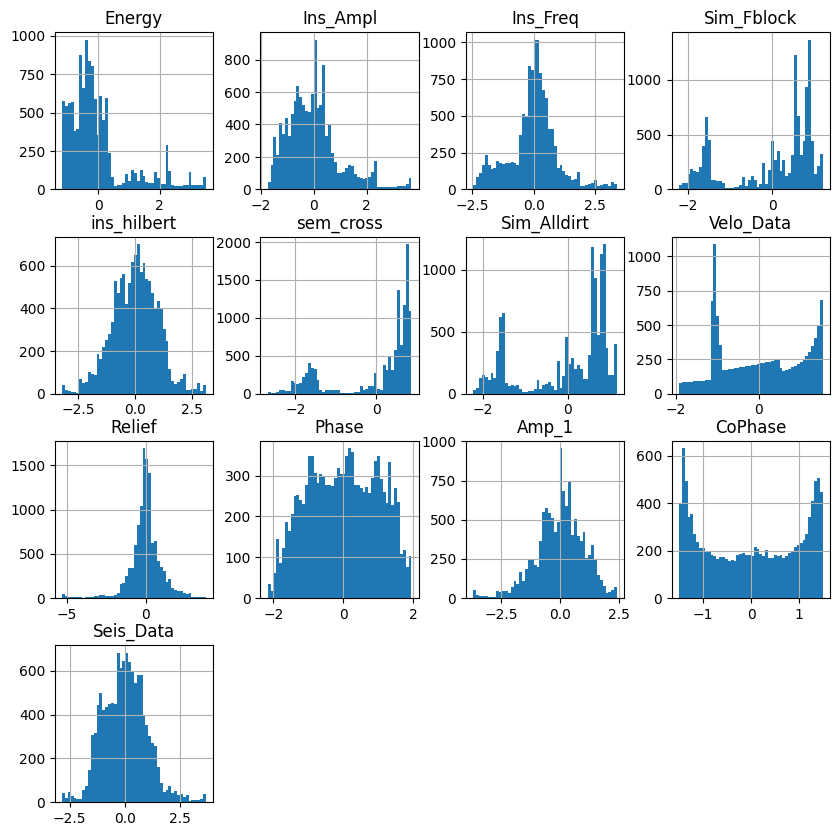

In [ ]:
#let all logs in same scale for machain prediction better
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler let all with same scaler
scaler = StandardScaler()
# Fit the scaler on the data and transform it
Xdata_S = scaler.fit_transform(Xdata)

# Convert the result back to a DataFrame (optional)
Xdata_new = pd.DataFrame(Xdata_S, columns=Xdata.columns)

# Show the standardized data
Xdata_new.hist(bins=50, figsize=(10,10))
plt.show()


In [ ]:
# Remove rows with NaN values in 'Vsh' column
df_new = df_new.dropna(subset=['Vsh'])

 # Redefine Xdata and ydata after removing NaNs
Xdata = df_new[['Energy', 'Ins_Ampl', 'Ins_Freq', 'Sim_Fblock', 'ins_hilbert', 'sem_cross', 'Sim_Alldirt', 'Velo_Data', 'Relief', 'Phase', 'Amp_1', 'CoPhase', 'Seis_Data']]
ydata = df_new['Vsh']

Features Importance

In [ ]:
# Feature Importance to use, Parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.25)
# Random Forest
Rfr = RandomForestRegressor()
Rfr.fit(X_train,y_train)
y_pred=Rfr.predict(X_test)
Rfr.score(X_test,y_test)*100

99.05373514640388

In [ ]:


#The code you provided is using a Random Forest Regressor to predict the 'Vsh' (V-shale) value based on other well logs like 'Energy', 'Ins_Ampl', etc. Let's break down what each part does:

#1. **`Rfr = RandomForestRegressor()`:** This line creates a RandomForestRegressor object named `Rfr`.  Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

#2. **`Rfr.fit(X_train,y_train)`:** This trains the Random Forest model using the training data.
   #- `X_train`: The features (independent variables) from your training dataset.
   #- `y_train`: The target variable (dependent variable), which in this case is 'Vsh', from your training dataset.
   # The model learns the relationship between the features and the target variable based on this training data.

#3. **`y_pred=Rfr.predict(X_test)`:** This uses the trained model to predict 'Vsh' values for the test data (`X_test`). The model takes the features from `X_test` and produces predicted values for `Vsh`, which are stored in `y_pred`.

#4. **`Rfr.score(X_test,y_test)*100`:** This evaluates the model's performance on the test data.
   #- `Rfr.score()` calculates the coefficient of determination (R² score) for the model.
   #- The R² score represents the proportion of the variance in the target variable that is predictable from the features. It ranges from 0 to 1, with higher values indicating better model performance.
   #- Multiplying by 100 gives the score as a percentage.

#**In essence, the code snippet performs the following steps:**

#1. **Data Preparation:** The code prepares data (e.g., standardizes it, handles missing values) for training and testing a model to predict 'Vsh' value based on other well log features.
#2. **Model Training:** It trains a Random Forest model using the prepared data, teaching it to learn the relationship between the features and 'Vsh'.
#3. **Model Prediction:** It then uses the trained model to predict 'Vsh' for a separate dataset that the model hasn't seen before (test dataset).
#4. **Model Evaluation:** It calculates the R² score on the test data to determine how well the model is predicting 'Vsh' for unseen data. This score helps to evaluate if the model is a good fit for this prediction task.


#This whole process is useful for building a predictive model that can estimate 'Vsh' (a crucial parameter related to shale volume, hydrocarbon potential, and other properties) from the well logs, potentially assisting in reservoir characterization and prediction.


In [ ]:
# Feature Importance
feature_imp = pd.Series(Rfr.feature_importances_,index=Xdata.columns).sort_values(ascending=False)
feature_imp

,0
sem_cross,0.280876
Sim_Alldirt,0.147646
Sim_Fblock,0.119283
Velo_Data,0.105355
Energy,0.085258
Ins_Ampl,0.068786
Amp_1,0.049191
Ins_Freq,0.045771
Relief,0.036974
Seis_Data,0.018301


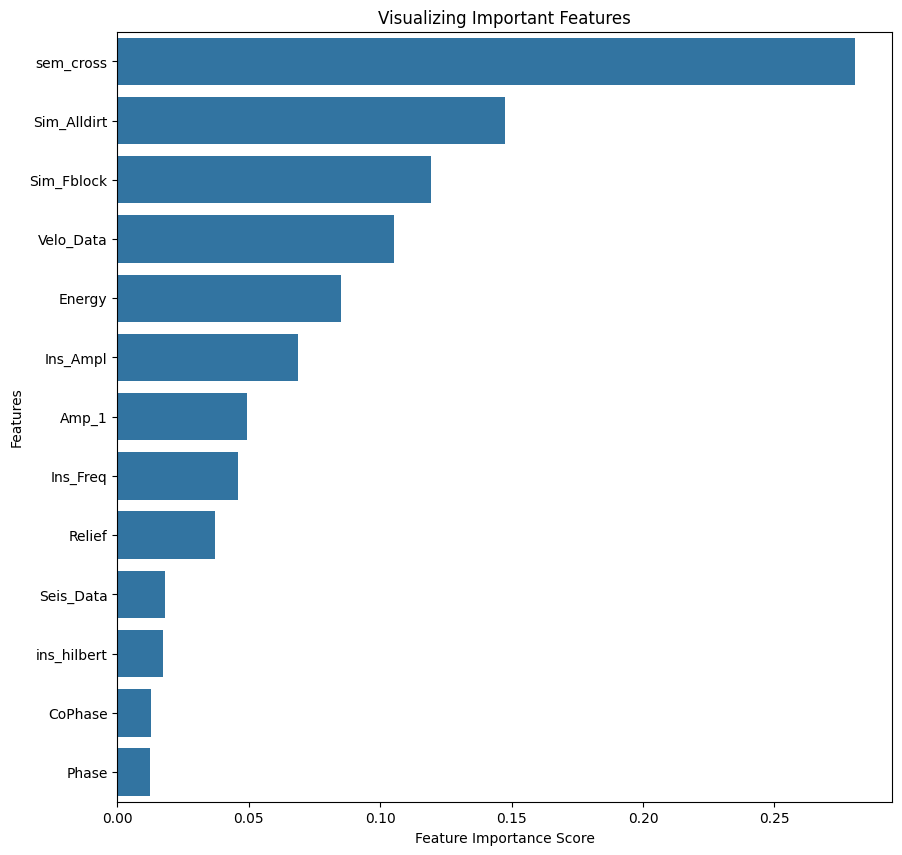

In [ ]:
#  Feature Importance Plotting
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# Define and export dataset for the next part
df_out = df_new[['Time',  'Vsh', 'Energy', 'sem_cross', 'Amp_1', 'Ins_Freq', 'ins_hilbert']]
df_out.to_csv('/content/drive/MyDrive/Colab Notebooks/ML FOR Geoscience/Vshale/F03-4_df_Vsh-out.csv')

print("Done Exporting")

Done Exporting
